# BANK MARKETING

# Información:

Los datos están relacionados con campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder acceder si al producto (depósito a plazo bancario) estaría 'yes' o no 'no' suscrito.

# Conjunto de datos de Marketing Bancario:

https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/Miguel Angel/Desktop/XG Boost/Bank_Train.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Observando la cantidad de filas y columnas
df.shape

(45211, 17)

In [5]:
# Observando los tipos de variables
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
# Separamos variables numericas y categoricas 
columnsNumeric   = ['age','balance','day','duration','campaign','pdays','previous']
columnsCategoric = ['job','marital','education','default','housing','loan','contact','month','poutcome']

In [7]:
# No existen valores nulos
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

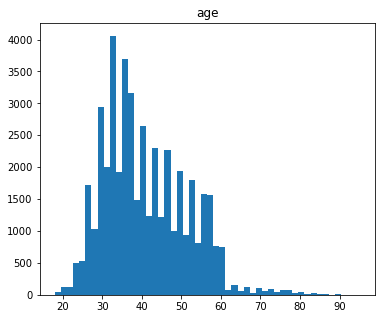

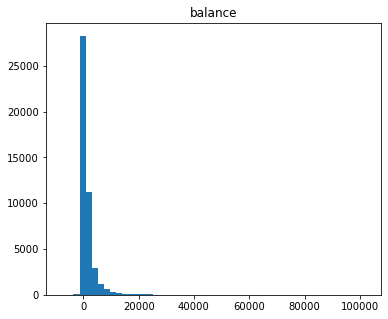

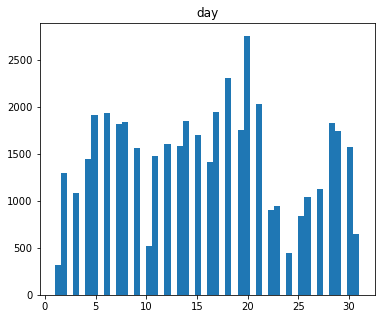

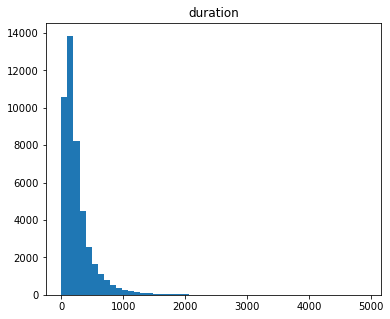

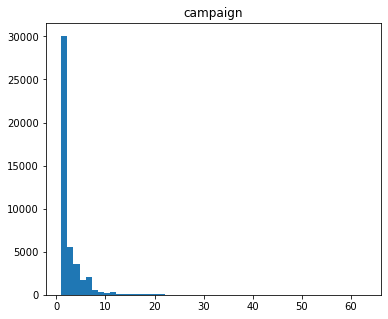

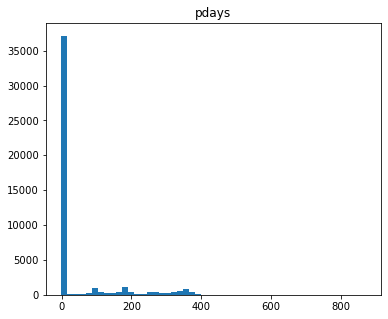

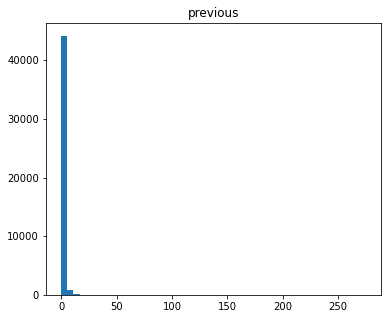

In [8]:
# Observando la distribución de las variables numéricas
for x in columnsNumeric:
    plt.figure(figsize=(6,5))
    plt.title(df[x].name)
    plt.hist(df[x], bins = 50)
    plt.show()

In [9]:
# Pasando las variables categóricas y numéricas a un dataframe
df_categoric = df[columnsCategoric]
df_numeric   = df[columnsNumeric]

In [10]:
# Describiendo las estadísticas básicas
df_numeric.describe() 

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# One hot encoding

In [11]:
# Tratamiento de variables categoricas (O-H-E)
one_hot_encoding = pd.get_dummies(df[columnsCategoric], columns = ['job','marital','education','default',
                                                                   'housing','loan','contact','month','poutcome'])
one_hot_encoding.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [12]:
# Reemplazando valores ("yes", "no") por ("1","0") numéricos
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [13]:
# Concatenamos las variables categóricas con el target 
df1 = pd.concat([one_hot_encoding, df['y']], axis=1)
df1.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [14]:
# Concatenamos las variables numéricas y categóricas 
df1 = pd.concat([df_numeric, df1], axis=1)
df1.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


# Correlación de las variables

In [15]:
corr_matrix = df1.corr(method='pearson')
corr_matrix

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,-0.055717,-0.044002,0.021792,...,0.019499,-0.127431,0.032775,0.060116,0.032418,-0.004927,-0.022967,0.035526,-0.000816,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,-0.026726,-0.048757,0.009642,...,0.023196,-0.071121,0.117254,0.040198,0.021922,0.011857,0.008466,0.035240,-0.030271,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.010455,-0.022898,-0.002312,...,-0.020749,-0.025066,0.096080,0.030514,-0.053890,-0.068700,-0.032952,-0.030321,0.086256,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,-0.015722,0.009637,-0.001327,...,-0.005519,0.007089,-0.006041,0.015076,0.015077,-0.018925,-0.001958,0.042389,-0.003491,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.021868,0.008986,0.002128,...,-0.018612,-0.067551,-0.084697,-0.051031,-0.036718,-0.088131,-0.020107,-0.057486,0.107965,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.027497,0.020063,-0.014203,...,0.032002,0.079029,0.007892,0.056814,0.084427,0.701052,0.389791,0.228539,-0.869962,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.014245,-0.017095,-0.008181,...,0.027273,0.001341,0.037868,0.053934,0.064990,0.350627,0.306615,0.201424,-0.532763,0.093236
job_admin.,-0.055717,-0.026726,-0.010455,-0.015722,-0.021868,0.027497,0.014245,1.000000,-0.188216,-0.066273,...,0.013225,0.026657,-0.007874,0.011293,0.007279,0.018431,0.010745,0.012056,-0.025940,0.005637
job_blue-collar,-0.044002,-0.048757,-0.022898,0.009637,0.008986,0.020063,-0.017095,-0.188216,1.000000,-0.096585,...,-0.041441,0.165448,-0.048027,-0.042410,-0.044816,0.002254,0.001342,-0.053074,0.022194,-0.072083
job_entrepreneur,0.021792,0.009642,-0.002312,-0.001327,0.002128,-0.014203,-0.008181,-0.066273,-0.096585,1.000000,...,-0.016615,-0.009908,0.051017,-0.012012,-0.007769,0.001119,-0.013506,-0.019111,0.014901,-0.019662


# Matriz de Correlación 

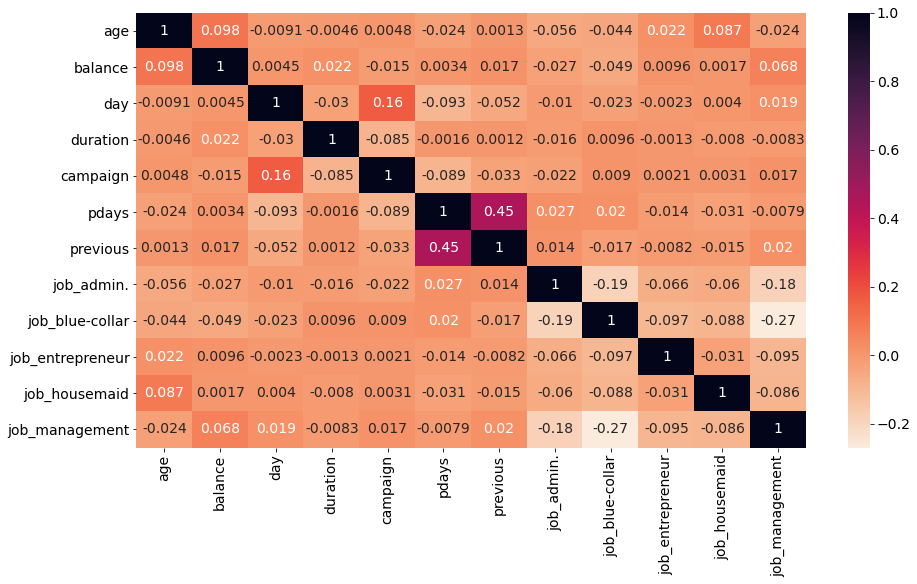

In [16]:
plt.rcParams['figure.figsize']= 15,8  #13,8 para 10 variables, #23,18 todas las variables
plt.rcParams['font.size'] = 14

df_small = df1.iloc[:,:12]
correlation = df_small.corr()
sns.heatmap(correlation, annot = True, cmap = sns.color_palette("rocket_r", as_cmap=True)) 
plt.show()

# Balanceo por el método SMOTE

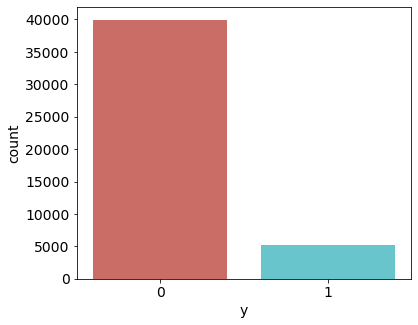

In [17]:
# Observando los datos sin balancear
plt.figure(figsize=(6,5))
sns.countplot(x='y', data = df1, palette = 'hls')
plt.show()

In [18]:
# Separando la variables predictoras y la variable predictiva 
X = df1.drop(['y'], axis=1)
y = df1['y']
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [63]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 100)
X_sm, y_sm = smote.fit_resample(X, y)

In [64]:
# Concatenando la información
df_balanceada = pd.concat([X_sm, y_sm], axis = 1)

In [65]:
df_balanceada.y.value_counts()

0    39922
1    39922
Name: y, dtype: int64

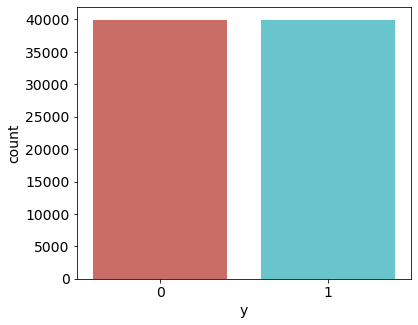

In [66]:
# Observando los datos balanceados
plt.figure(figsize=(6,5))
sns.countplot(x='y', data = df_balanceada, palette = 'hls')
plt.show()

In [67]:
# Separando la variables predictoras y la variable predictiva 
X1 = df_balanceada.drop(['y'], axis=1)
y1 = df_balanceada['y']
X1.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


# Estandarizando 

In [68]:
# Standarizando las variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X1)
X_scaler = pd.DataFrame(X_scaler)
X_scaler.columns = X.columns

In [69]:
X2 = X_scaler
y2 = y1
X2.shape, y2.shape

((79844, 51), (79844,))

In [166]:
# Selección de variables importantes por XG Boost
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric = 'auc', random_state = 100)
xgb.fit(X2, y2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [167]:
# Selección de variables importantes por XG Boost
xgb.feature_importances_

array([0.00125396, 0.00102209, 0.00221151, 0.01989063, 0.00290578,
       0.00332314, 0.00097718, 0.00308338, 0.01728534, 0.00315929,
       0.00335672, 0.00932809, 0.00318522, 0.00355032, 0.00332823,
       0.00194738, 0.00987025, 0.00324185, 0.00226652, 0.02725886,
       0.01584039, 0.03004885, 0.03891007, 0.01729851, 0.03509337,
       0.03433655, 0.00170396, 0.00774634, 0.05116696, 0.10004249,
       0.01432279, 0.04918016, 0.00334369, 0.01512825, 0.09426518,
       0.01173771, 0.03400528, 0.00335981, 0.01256279, 0.01922239,
       0.03303025, 0.0067888 , 0.00243999, 0.020538  , 0.02563681,
       0.00462416, 0.00300843, 0.02543045, 0.03168039, 0.00959904,
       0.12546238], dtype=float32)

In [168]:
# Creando tabla de Importancia de Variables
TablaImportancia = pd.concat([pd.DataFrame({'Features': list(X2)}),
                              pd.DataFrame({'Importancia': list(xgb.feature_importances_)})], axis = 1)
ImportVariables = TablaImportancia[['Features','Importancia']].sort_values('Importancia',ascending=False).reset_index(drop=True)
ImportVariables

,Features,Importancia
0,poutcome_unknown,0.125462
1,housing_yes,0.100042
2,contact_unknown,0.094265
3,housing_no,0.051167
4,loan_yes,0.049180
5,education_primary,0.038910
6,education_tertiary,0.035093
7,education_unknown,0.034337
8,month_aug,0.034005
9,month_jul,0.033030


# Gráfica de Variables importantes 

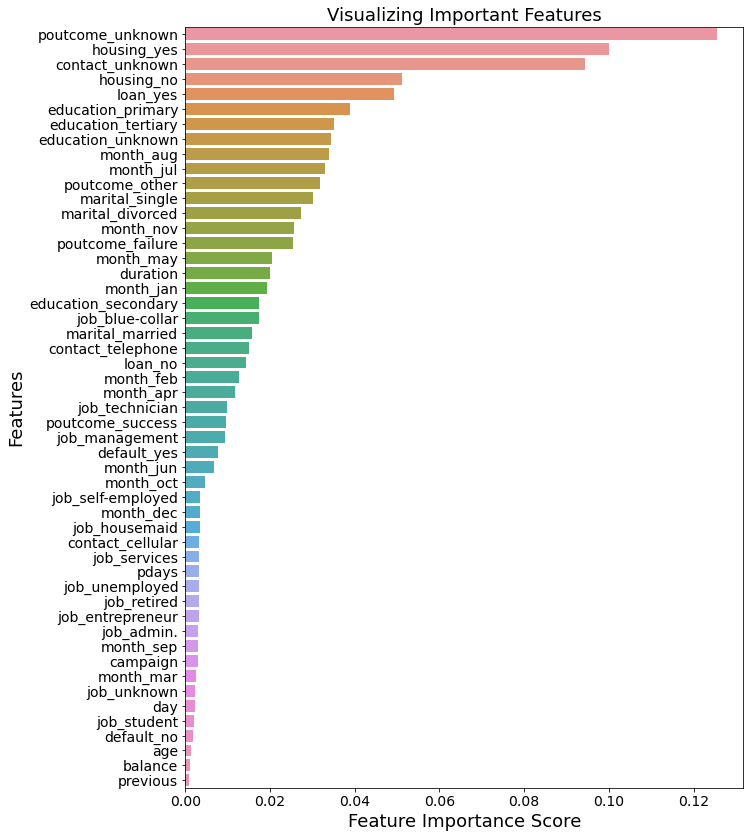

In [169]:
plt.figure(figsize = (10,14))
sns.barplot(x = ImportVariables['Importancia'], y = ImportVariables['Features'])
plt.xlabel('Feature Importance Score',fontsize=18)
plt.ylabel('Features', fontsize=18)
plt.title("Visualizing Important Features",fontsize=18)
plt.show()

In [170]:
# Eliminando variables menos importantes
X3 = X2.drop(['previous','balance','age','month_mar','job_student','job_unknown',
              'day','pdays','default_yes','campaign','job_admin.',
              'default_no','month_sep','month_dec'], axis=1)
X3.shape, y2.shape

((79844, 37), (79844,))

In [171]:
# Partición de Datos: Train, Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X3, y2, stratify = y2,
                                                    test_size = 0.3, random_state = 100)

In [172]:
# Cantidad de datos de entrenamiento 
X_train.shape, y_train.shape

((55890, 37), (55890,))

# Cross Validation

In [173]:
from sklearn.model_selection import GridSearchCV

parameters = {  'objective':['binary:logistic'],
                'eval_metric' : ['auc'],
                'max_depth'  :    list(range(2, 8)),     # Profundidad máxima
                'learning_rate'  : [0.3, 0.1, 0.03] ,    # tasa de aprendizaje
                'n_estimators'  : [180,200]}             # list(range(80,200,4))

In [174]:
# Definiendo el modelo
model_xgb = XGBClassifier(random_state = 100)

In [175]:
# Ejecutando Grid Search
import time
inicio = time.time()

GridSearch = GridSearchCV(model_xgb, parameters,
                          cv = 5,
                          n_jobs = 5)

GridSearch.fit(X_train, y_train.ravel())

fin = time.time()
print('El tiempo de ejecución es: ', (fin-inicio)/60, 'minutos') 

El tiempo de ejecución es:  12.522697671254475 minutos


In [177]:
# Mejores parámetros:
print('Los mejores parámetros son :', GridSearch.best_params_)
print('Con el mejor auc : ', GridSearch.best_score_)

Los mejores parámetros son : {'eval_metric': 'auc', 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 180, 'objective': 'binary:logistic'}
Con el mejor auc :  0.9440508140991233


# Entrenando el modelo XG-BOOST

In [187]:
from xgboost import XGBClassifier

xgbc=XGBClassifier( n_estimators = 200,
                    max_depth = 4,
                    learning_rate = 0.3,
                    eval_metric = 'auc',
                    objective = 'binary:logistic', 
                    n_jobs = 6,
                    random_state = 100)
 
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [188]:
# Entrenando el algoritmo para validar
y_predict_train = xgbc.predict(X_train)   # Predicción sobre el train
y_predict_test  = xgbc.predict(X_test)    # Predicción sobre el test 

In [189]:
from sklearn.metrics import accuracy_score
# Calculando el Accurary 
print('Accuracy Train :', accuracy_score(y_train, y_predict_train))
print('Accuracy Test  :', accuracy_score(y_test, y_predict_test))

Accuracy Train : 0.9563607085346216
Accuracy Test  : 0.9444769140853302


In [190]:
# Calculando la precisión 
from sklearn.metrics import precision_score
print('Precisión train :', precision_score(y_train, y_predict_train))
print('Precisión test  :', precision_score(y_test, y_predict_test))

Precisión train : 0.9690672355450934
Precisión test  : 0.9572275186807524


In [191]:
# Calculando el recall
from sklearn.metrics import recall_score
print('Recall train :', recall_score(y_train, y_predict_train))
print('Recall test  :', recall_score(y_test, y_predict_test))

Recall train : 0.9428162461978887
Recall test  : 0.9305335225849545


Cuadro Comparativo para train:

In [192]:
from sklearn.metrics import classification_report
report_train = classification_report(y_train, y_predict_train)
print(report_train) 

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     27945
           1       0.97      0.94      0.96     27945

    accuracy                           0.96     55890
   macro avg       0.96      0.96      0.96     55890
weighted avg       0.96      0.96      0.96     55890



Cuadro Comparativo para test:

In [193]:
report_test = classification_report(y_test, y_predict_test)
print(report_test)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11977
           1       0.96      0.93      0.94     11977

    accuracy                           0.94     23954
   macro avg       0.94      0.94      0.94     23954
weighted avg       0.94      0.94      0.94     23954



In [194]:
from sklearn.metrics import confusion_matrix
# Matriz de confusión train 
m_confusion_train = confusion_matrix(y_train, y_predict_train)
print('Matriz de Confusión train:')
m_confusion_train

Matriz de Confusión train:


array([[27104,   841],
       [ 1598, 26347]], dtype=int64)

[Text(0, 0.5, 'Si producto'), Text(0, 1.5, 'No producto')]

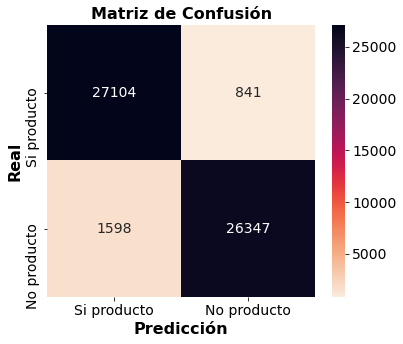

In [195]:
plt.figure(figsize=(6,5)) 
ax= plt.subplot()
sns.heatmap(m_confusion_train, annot=True, ax = ax, cmap=sns.color_palette("rocket_r", as_cmap=True), fmt='g')
ax.set_xlabel('Predicción', fontweight='bold', fontsize=16)
ax.set_ylabel('Real', fontsize=16, fontweight='bold')
ax.set_title('Matriz de Confusión', fontsize=16, fontweight='bold')
ax.xaxis.set_ticklabels(['Si producto', 'No producto'], fontsize=14)
ax.yaxis.set_ticklabels(['Si producto', 'No producto'], fontsize=14)

In [196]:
# Matriz de confusión test 
m_confusion_test = confusion_matrix(y_test, y_predict_test)
print('Matriz de Confusión test:')
m_confusion_test

Matriz de Confusión test:


array([[11479,   498],
       [  832, 11145]], dtype=int64)

[Text(0, 0.5, 'Si producto'), Text(0, 1.5, 'No producto')]

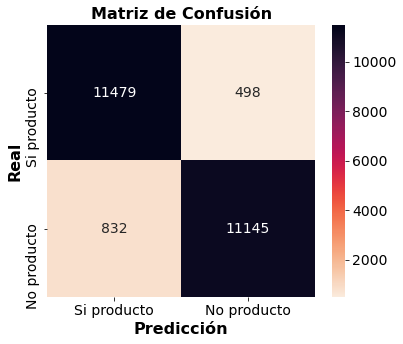

In [197]:
plt.figure(figsize=(6,5)) 
ax= plt.subplot()
sns.heatmap(m_confusion_test, annot=True, ax = ax, cmap=sns.color_palette("rocket_r", as_cmap=True), fmt='g')
ax.set_xlabel('Predicción', fontweight='bold', fontsize=16)
ax.set_ylabel('Real', fontsize=16, fontweight='bold')
ax.set_title('Matriz de Confusión', fontsize=16, fontweight='bold')
ax.xaxis.set_ticklabels(['Si producto', 'No producto'], fontsize=14)
ax.yaxis.set_ticklabels(['Si producto', 'No producto'], fontsize=14)

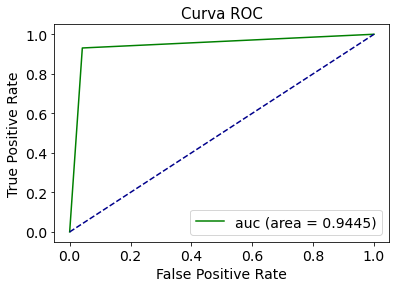

In [198]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_predict_test)
fpr, tpr, threshold = roc_curve(y_test, y_predict_test)
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, color = 'green', label = 'auc (area = %0.4f)' % auc) 
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.title('Curva ROC', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend()
plt.show()

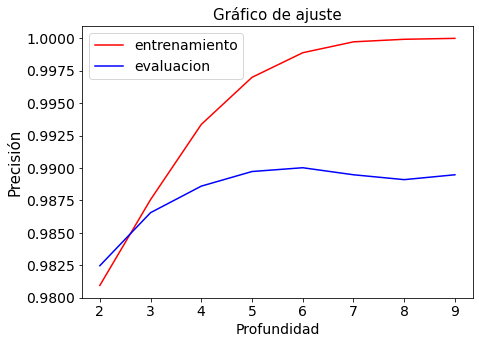

In [199]:
# Gráfico de ajuste de los árboles
train_predict = []
test_predict  = []
max_deep_list = list(range(2, 10))

for deep in max_deep_list:
    arboles = XGBClassifier(n_estimators = 200,
                                   max_depth = deep, 
                                   eval_metric = 'auc',
                                   n_jobs = 5,
                                   random_state = 100)
    
    arboles.fit(X_train, y_predict_train)
    train_predict.append(arboles.score(X_train, y_predict_train))
    test_predict.append(arboles.score(X_test,  y_predict_test))

# Gráfica de los resultados
plt.figure(figsize = (7,5))
plt.plot(max_deep_list, train_predict, color = 'red', label ='entrenamiento')
plt.plot(max_deep_list, test_predict, color = 'blue', label ='evaluacion')
plt.title('Gráfico de ajuste', fontsize=15)
plt.ylabel('Precisión', fontsize=15)
plt.xlabel('Profundidad', fontsize=14)
plt.legend()
plt.show()